In [115]:
# Library for accessing the tweets can learn more about it in the tweepy documentation
# tweepy documentation link : https://docs.tweepy.org/en/stable/
import tweepy
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 

In [116]:
#from twitter developer account accessing the twitter getting the access keys and API key
consumer_key = 'Zp5TjYyPDNHrDneD3ClSllAVB'
consumer_secret = 'IskN8ZsEKPieuvyQHgNQS7fIOKyt53boNfkJqG4nyZ4Ni1o4LE'
access_token = '1095398878050869248-PzeOQ21rDMKcL40x80FNBpe59kLBkr'
access_token_secret = '3n9qZxSSkHlyyR7otAYaH0OThCaQPd35IDPfROz4tCDNE'

In [117]:
#authenticating the API through tweepy authentication build-in function can read more about 
#tweepy library in its documentation
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [118]:
#searching for keyword "covid"
key_word = 'covid'

In [119]:
#listing all tweets that have keyword covid in its discussion
#these are all live tweets from the twitter API till date
i=0
for tweet in api.search(key_word):
    print(i,tweet.text,'\n')
    i = i + 1

0 RT @Daniel78037553: Demonstrated to know the real situation of Myanmar about Covid-19 infections under the control of Military Terrorists w… 

1 RT @opropriofaka: O governador Dória não aglomerou, lavou as mãos, usou álcool, ficou em casa, usou máscara até pra dormir, tomou duas dose… 

2 RT @Thailand_Post: ไปรษณีย์ไทย ชี้แจงกรณี เจ้าหน้าที่ไปรษณีย์ ติดเชื้อ covid-19 (16 ก.ค. 64) https://t.co/643LkUL8Ca 

3 RT @HueteFuturo: Desde la Fundación Huete Futuro nos alegra sentir que vamos despertando del letargo impuesto por Covid y este verano vamos… 

4 RT @amandaamryy: hugs are so nice cant remember the last time i hugged someone sheesh covid go away 😭😭😭😭 

5 RT @ARanganathan72: An American acquaintance, a scientist, asked me the other day why only Hindus were dying of CoVID in India - was there… 

6 @AngryBlackLady Why lock down vaccinated people? @Surgeon_General reports that 99.5% of recent COVID-19 deaths were… https://t.co/cYkDDpunAf 

7 RT @Beany_1: Global (scientists condemn) Bri

In [120]:
#number of tweets we want to import we can increase the number if we want a generalized view
limit = 5000

In [121]:
import pandas as pd
import re

In [122]:
#function to clean the tweets removing unnecessary charachters
def TextClean(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r' @[a-z0-9_]+', '', tweet)
    tweet = re.sub(r' #[a-z0-9_]+', '',tweet)
    tweet = re.sub(r' &[a-z0-9_]+', '',tweet)
    tweet = re.sub(r' [?!.+,:/\)(;$%&"]+', '',tweet)
    tweet = re.sub(r' rt+','',tweet)
    tweet = re.sub(r' \d+','',tweet)
    tweet = re.sub(r' \$','',tweet)
    tweet = re.sub(r' https?:?\/\/\S+', '', tweet)
    
    return tweet

In [123]:
def tweet_search(key_word):
    i = 0
    tweets_df = pd.DataFrame(columns = ['Datetime','Tweet','Username','Retweets','Followers'])
    for tweet in tweepy.Cursor(api.search, q=key_word, count=100,lang='en', tweet_mode='extended').items():
        print('Tweets Downloaded:',i ,'/',limit,end='\r')
        if(tweet.user.followers_count>1000): #we only scan tweets of those who have followers more than 10000 as person with more followers have genuine tweets its an assumption
            tweets_df = tweets_df.append({ 'Datetime':tweet.created_at, 
                                           'Tweet':tweet.full_text, 
                                           'Username':tweet.user.screen_name, 
                                           'Retweets':tweet.retweet_count,
                                           'Followers':tweet.user.followers_count}, ignore_index=True)    
                 
            i+=1
        if i>=limit:
              break
        else:
              pass
    tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime'], format='%Y.%m.%d %H:%M:%S')   
    tweets_df.set_index('Datetime', inplace=True)
    tweets_df.drop_duplicates(subset=['Tweet'],inplace=True)
    tweets_df['CleanTweet'] = tweets_df['Tweet'].apply(TextClean)
    tweet_tokenizer = TweetTokenizer()
    tweets_df['CleanTweet'] = tweets_df['CleanTweet'].apply(tweet_tokenizer.tokenize)
    tweets_df['CleanTweet']=[','.join(map(str,token)) for token in tweets_df['CleanTweet']]
    #tweets_df.to_csv(key_word + '_tweets.csv', encoding='utf-8') # converted all the 5000 tweets into a CSV file will be sending you this
    return tweets_df

In [124]:
tweets_df = tweet_search(key_word)

In [125]:
# we have all the tweets with date and time tweeter ID retweets followers and clean tweets without unnecessary charachters
tweets_df

,Tweet,Username,Retweets,Followers,CleanTweet
Datetime,,,,,
2021-07-16 12:47:15,RT @bryanjdouglas: @zen4ever2us I get my secon...,zen4ever2us,1,20743,"rt,:,i,get,my,second,dose,next,week,.,even,wit..."
2021-07-16 12:47:15,I appear to have unlocked the lunatic fringe o...,josh_greenberg,0,5380,"i,appear,to,have,unlocked,the,lunatic,fringe,o..."
2021-07-16 12:47:14,RT @narendramodi: Reviewed the COVID-19 situat...,richapandey,1715,17182,"rt,:,reviewed,the,covid,-,19,situation,with,ch..."
2021-07-16 12:47:14,RT @mdouganlpool: Who do these pesky experts t...,brewdog1950,60,3170,"rt,:,who,do,these,pesky,experts,think,they,are..."
2021-07-16 12:47:14,Government ‘should write off’ £1.7bn of Covid ...,BirminghamCnctn,0,2839,"government,‘,should,write,off,’,£,1.7,bn,of,co..."
...,...,...,...,...,...
2021-07-16 12:29:29,RT @TREASUREunion: #TREASURE NAVER\n\nMC JIHOO...,mermaidlouise16,796,1123,"rt,:,naver,mc,jihoon,will,not,be,attending,thi..."
2021-07-16 12:29:29,@kackles74 @K1rr1ly @hughriminton @nick_coatsw...,just_brash,0,1881,"@kackles74,he,also,needs,to,nominate,some,fami..."
2021-07-16 12:29:28,"Police to enforce social distancing, wearing o...",The_Standard_,0,4891,"police,to,enforce,social,distancing,,,wearing,..."


In [126]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [127]:
all_tweets = ''.join(tweet for tweet in tweets_df['CleanTweet'])
all_tweets

'rt,:,i,get,my,second,dose,next,week,.,even,with,that,,,i,am,‘,still,personally,’,,,going,to,keep,doing,what,i,can,lim,…i,appear,to,have,unlocked,the,lunatic,fringe,of,the,twitterverse,.,it,hurts,my,feelings,when,simpsons,characters,,,anti-vaxxers,,,covid-deniers,and,anonymous,accounts,with,some,of,the,dumbest,names,i\'ve,ever,seen,write,mean,words,at,me,.rt,:,reviewed,the,covid,-,19,situation,with,chief,ministers,.,emphasised,on,testing,,,tracking,and,treating,to,overcome,the,pandem,…rt,:,who,do,these,pesky,experts,think,they,are,?,don\'t,they,realise,:,johnson\'s,britain,is,a,worldbeating,hyperleader,in,turboch,…government,‘,should,write,off,’,£,1.7,bn,of,covid,loan,debt,#dottydirectoryask,yourself,this,one,question,..,why,don,’,t,other,countries,have,the,sort,of,healthcare,backlogs,we,’,ve,generated,by,our,covid,response,?,then,tell,me,whether,hancock,and,senior,nhs,hierarchy,did,their,jobs,.rt,:,\',the,honeymoon,is,over,\',dr,.,murphy,answers,viewer,covid,-,19,questionsrt,:,hugs,ar

In [128]:
WordCloud = WordCloud(width=800, height=400, random_state=21, max_font_size = 100, collocations = False).generate(all_tweets)

(-0.5, 799.5, 399.5, -0.5)

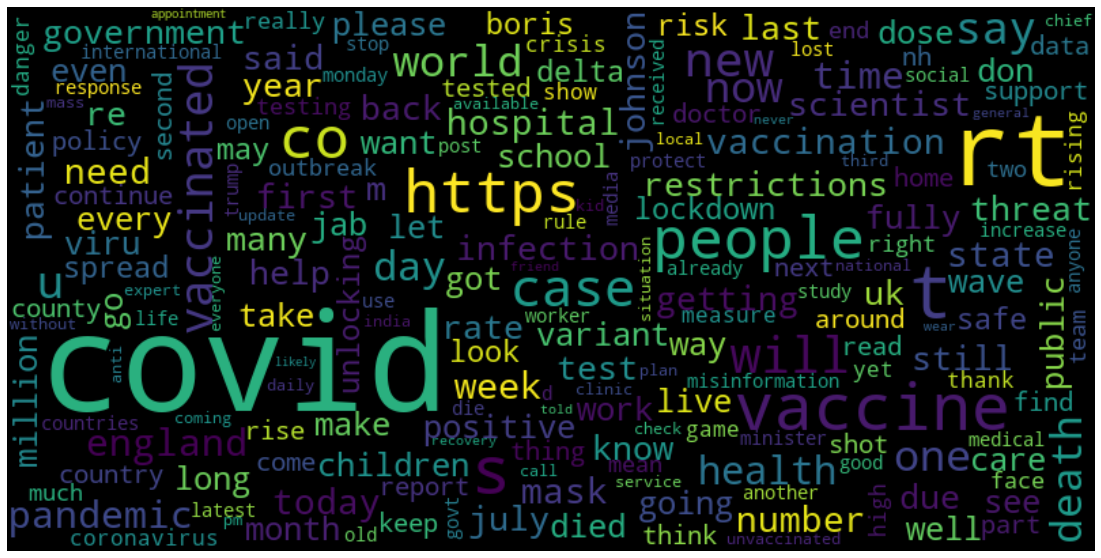

In [129]:
#generating a wordcloud of most used number word in the tweets. the more the number of word appears in the tweet the more the size of the word in wordcloud
plt.figure(figsize=(30,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')

In [130]:
#converting tweets into tokens
tokens = word_tokenize(all_tweets)
tokens

['rt',
 ',',
 ':',
 ',',
 'i',
 ',',
 'get',
 ',',
 'my',
 ',',
 'second',
 ',',
 'dose',
 ',',
 'next',
 ',',
 'week',
 ',',
 '.',
 ',',
 'even',
 ',',
 'with',
 ',',
 'that',
 ',',
 ',',
 ',',
 'i',
 ',',
 'am',
 ',',
 '‘',
 ',',
 'still',
 ',',
 'personally',
 ',',
 '’',
 ',',
 ',',
 ',',
 'going',
 ',',
 'to',
 ',',
 'keep',
 ',',
 'doing',
 ',',
 'what',
 ',',
 'i',
 ',',
 'can',
 ',',
 'lim',
 ',',
 '…i',
 ',',
 'appear',
 ',',
 'to',
 ',',
 'have',
 ',',
 'unlocked',
 ',',
 'the',
 ',',
 'lunatic',
 ',',
 'fringe',
 ',',
 'of',
 ',',
 'the',
 ',',
 'twitterverse',
 ',',
 '.',
 ',',
 'it',
 ',',
 'hurts',
 ',',
 'my',
 ',',
 'feelings',
 ',',
 'when',
 ',',
 'simpsons',
 ',',
 'characters',
 ',',
 ',',
 ',',
 'anti-vaxxers',
 ',',
 ',',
 ',',
 'covid-deniers',
 ',',
 'and',
 ',',
 'anonymous',
 ',',
 'accounts',
 ',',
 'with',
 ',',
 'some',
 ',',
 'of',
 ',',
 'the',
 ',',
 'dumbest',
 ',',
 'names',
 ',',
 'i',
 "'ve",
 ',',
 'ever',
 ',',
 'seen',
 ',',
 'write',
 ',',
 'mean'

In [131]:
#length of tweets versus length of tweets after tokenization
print('Number of word in tweets',len(all_tweets))
print('Number of words in tokens',len(tokens))

Number of word in tweets 446979
Number of words in tokens 167847


In [132]:
#lemmatization of tweets
lemmatizer = WordNetLemmatizer() 
lemma = [lemmatizer.lemmatize(tweet,pos='v') for tweet in tokens] 
print(tokens[:20]) 
print(lemma[:20])

['rt', ',', ':', ',', 'i', ',', 'get', ',', 'my', ',', 'second', ',', 'dose', ',', 'next', ',', 'week', ',', '.', ',']
['rt', ',', ':', ',', 'i', ',', 'get', ',', 'my', ',', 'second', ',', 'dose', ',', 'next', ',', 'week', ',', '.', ',']


In [133]:
#stemming of tweets
porter_stemmer = PorterStemmer()
stemm = [porter_stemmer.stem(tweet) for tweet in tokens]
print(tokens[:20])
print(stemm[:20])

['rt', ',', ':', ',', 'i', ',', 'get', ',', 'my', ',', 'second', ',', 'dose', ',', 'next', ',', 'week', ',', '.', ',']
['rt', ',', ':', ',', 'i', ',', 'get', ',', 'my', ',', 'second', ',', 'dose', ',', 'next', ',', 'week', ',', '.', ',']


In [134]:
#comparing tokens stemmatization and lemmatization of tweets
df = pd.DataFrame(columns = ['Tokens','Stemm','Lemma'])
df['Tokens'] = tokens[:50]
df['Stemm'] = stemm[:50]
df['Lemma'] = lemma[:50]
df

,Tokens,Stemm,Lemma
0,rt,rt,rt
1,",",",",","
2,:,:,:
3,",",",",","
4,i,i,i
5,",",",",","
6,get,get,get
7,",",",",","
8,my,my,my
9,",",",",","


In [135]:
#from vader library.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [136]:
vader = SentimentIntensityAnalyzer()

In [137]:
print(vader.polarity_scores('This is good'))
print(vader.polarity_scores('This is really good'))
print(vader.polarity_scores('This is great'))
print(vader.polarity_scores('This is terrible'))
print(vader.polarity_scores('How are you? :)'))
print(vader.polarity_scores('How are you? :('))
print(vader.polarity_scores('How are you? :('))
print(vader.polarity_scores('This is fine'))
print(vader.polarity_scores('This is fine!'))
print(vader.polarity_scores('This is FINE!'))
print(vader.polarity_scores('I used to love him, but now I see he is jerk'))

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}
{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}
{'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.489, 'pos': 0.511, 'compound': 0.2714}
{'neg': 0.0, 'neu': 0.415, 'pos': 0.585, 'compound': 0.4263}
{'neg': 0.197, 'neu': 0.637, 'pos': 0.166, 'compound': -0.128}


In [138]:
#from textblob library
from textblob import TextBlob

In [139]:
print(TextBlob('This is good').sentiment)
print(TextBlob('This is really good').sentiment)
print(TextBlob('This is great').sentiment)
print(TextBlob('This is terrible').sentiment)
print(TextBlob('How are you').sentiment)
print(TextBlob('How are you? :)').sentiment)
print(TextBlob('How are you? :(').sentiment)
print(TextBlob('thi is fine').sentiment)
print(TextBlob('this is fine!').sentiment)
print(TextBlob('this is FINE!').sentiment)
print(TextBlob('I used to love him, but now I see he is jerk').sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=0.4166666666666667, subjectivity=0.5)
Sentiment(polarity=0.5208333333333334, subjectivity=0.5)
Sentiment(polarity=0.5208333333333334, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.6)


In [140]:
def vader_compound_score(tweet):
    vader = SentimentIntensityAnalyzer()
    if vader.polarity_scores(tweet)['compound'] >= 0.05:
        return 'Positive'
    elif vader.polarity_scores(tweet)['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [141]:
tweets_df['Vader_sent'] = tweets_df['CleanTweet'].apply(vader_compound_score)
tweets_df['TextBlob_sent'] = tweets_df['CleanTweet'].apply(textblob_sentiment)
tweets_df['Different_sent'] = np.where(tweets_df['Vader_sent']!=tweets_df['TextBlob_sent'],1,0)


In [142]:
tweets_df.head(30)

,Tweet,Username,Retweets,Followers,CleanTweet,Vader_sent,TextBlob_sent,Different_sent
Datetime,,,,,,,,
2021-07-16 12:47:15,RT @bryanjdouglas: @zen4ever2us I get my secon...,zen4ever2us,1,20743,"rt,:,i,get,my,second,dose,next,week,.,even,wit...",Neutral,Neutral,0
2021-07-16 12:47:15,I appear to have unlocked the lunatic fringe o...,josh_greenberg,0,5380,"i,appear,to,have,unlocked,the,lunatic,fringe,o...",Neutral,Neutral,0
2021-07-16 12:47:14,RT @narendramodi: Reviewed the COVID-19 situat...,richapandey,1715,17182,"rt,:,reviewed,the,covid,-,19,situation,with,ch...",Neutral,Neutral,0
2021-07-16 12:47:14,RT @mdouganlpool: Who do these pesky experts t...,brewdog1950,60,3170,"rt,:,who,do,these,pesky,experts,think,they,are...",Neutral,Neutral,0
2021-07-16 12:47:14,Government ‘should write off’ £1.7bn of Covid ...,BirminghamCnctn,0,2839,"government,‘,should,write,off,’,£,1.7,bn,of,co...",Neutral,Neutral,0
2021-07-16 12:47:14,Ask yourself this one question..\n\nWhy don’t ...,EssexPR,0,180827,"ask,yourself,this,one,question,..,why,don,’,t,...",Neutral,Neutral,0
2021-07-16 12:47:13,RT @WGNMorningNews: 'The honeymoon is over' Dr...,momness1,2,1874,"rt,:,',the,honeymoon,is,over,',dr,.,murphy,ans...",Neutral,Neutral,0
2021-07-16 12:47:12,RT @amandaamryy: hugs are so nice cant remembe...,goldenflickerrr,2623,2638,"rt,:,hugs,are,so,nice,cant,remember,the,last,t...",Negative,Neutral,1
2021-07-16 12:47:12,@AngryBlackLady Why lock down vaccinated peopl...,pkalina,0,1149,"@angryblacklady,why,lock,down,vaccinated,peopl...",Neutral,Neutral,0


In [143]:
vader_pie = [len(tweets_df[tweets_df['Vader_sent']=='Positive']),
            len(tweets_df[tweets_df['Vader_sent'] == 'Negative']),
            len(tweets_df[tweets_df['Vader_sent'] == 'Neutral'])]
blob_pie = [len(tweets_df[tweets_df['TextBlob_sent']=='Positive']),
            len(tweets_df[tweets_df['TextBlob_sent'] == 'Negative']),
            len(tweets_df[tweets_df['TextBlob_sent'] == 'Neutral'])]

labels = ['positive','negative','neutral']
colors = ['aquamarine','tomato','skyblue']


97 times tow approaches show different results


Text(0.5, 1.0, 'TextBlob')

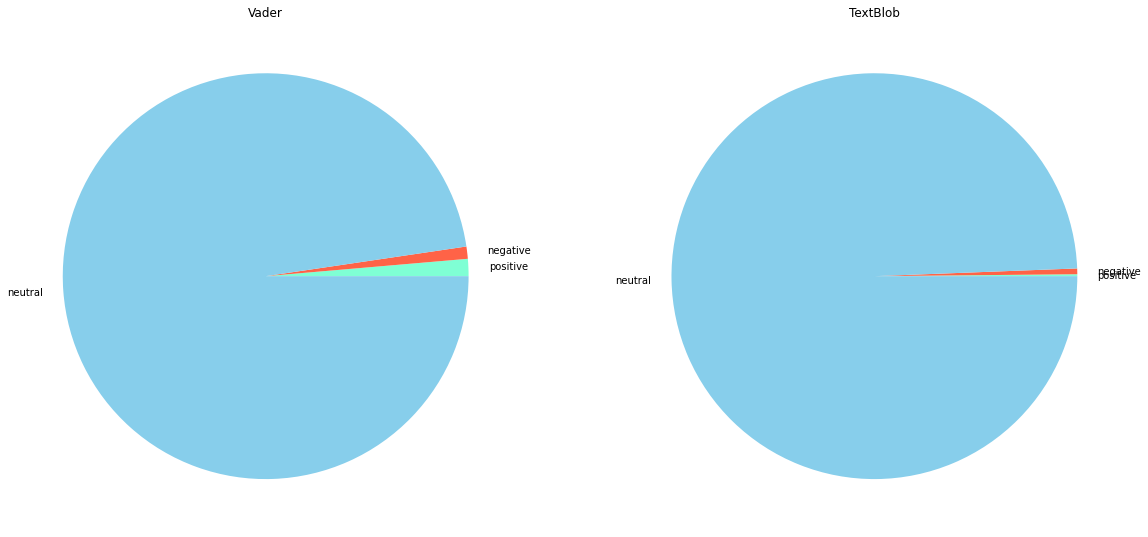

In [144]:
print(len(tweets_df[tweets_df['Different_sent']==1]), 'times tow approaches show different results')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(vader_pie,labels=labels,colors=colors)
plt.title('Vader')


plt.subplot(1,2,2)
plt.pie(blob_pie,labels=labels,colors=colors)
plt.title('TextBlob')